# Lecture 3: Data Visualization

We've now learned the basics of R and how to manipulate and clean data with R. Let's dive into a field that arguably R is most useful for: data visualization.  

In this lecture we will learn:

1. Why data visualization is important,
2. Notable techniques used to visualize data,
3. The challenges of data visualization, and
4. Useful visual tools available in R.

## Why is Data Visualization Important?

Visualizing data is crucial in communicating ideas. We more readily and easily process information that is visual rather than abstract in nature. Since much of the output that arises from data analytics is abstract, visualization allows both easy digestion of complex patterns and presentation of consequent insight to those from non-technical backgrounds.

Many avoid data visualization because the process can be time-consuming, and good visuals are perceived to be hard to make. But many latent trends in a dataset can only be made noticeable via visualization. Not visualizing at all can result in a lack of foresight when it comes to model and parameter selection. When in doubt, visualize!

Note that there are typically two types of visualizations: __distributional__ (using histograms or box plots to assess the distribution of a variable) and __correlational__ (using line plots or scatter plots to understand the relationship between two variables).

The process of data visualization usually works in the following fashion:  

* Simple data analysis (correlational, summarize)
* Data visualization
* Identification of pattern
* Secondary analysis or implementation

Let's see how this works using the built-in `iris` dataset in R. This dataset is based on a famous experiment conducted by R.A. Fisher [1].

In [1]:
data(iris)
str(iris)
summary(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

This dataset is a good example of a classification problem, where we can use this dataset to train an algorithm that outputs species given Sepal.Length, width and petal width and length.  
### First Step: Correlational Analysis

In [2]:
cor(iris[,1:4])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


We can see that there is a negative correlation between the sepal features and positive correlation between petal features. However, linear correlation reveals little of the actual dynamics of the data, as will be shown below
## Second Step:Visualization

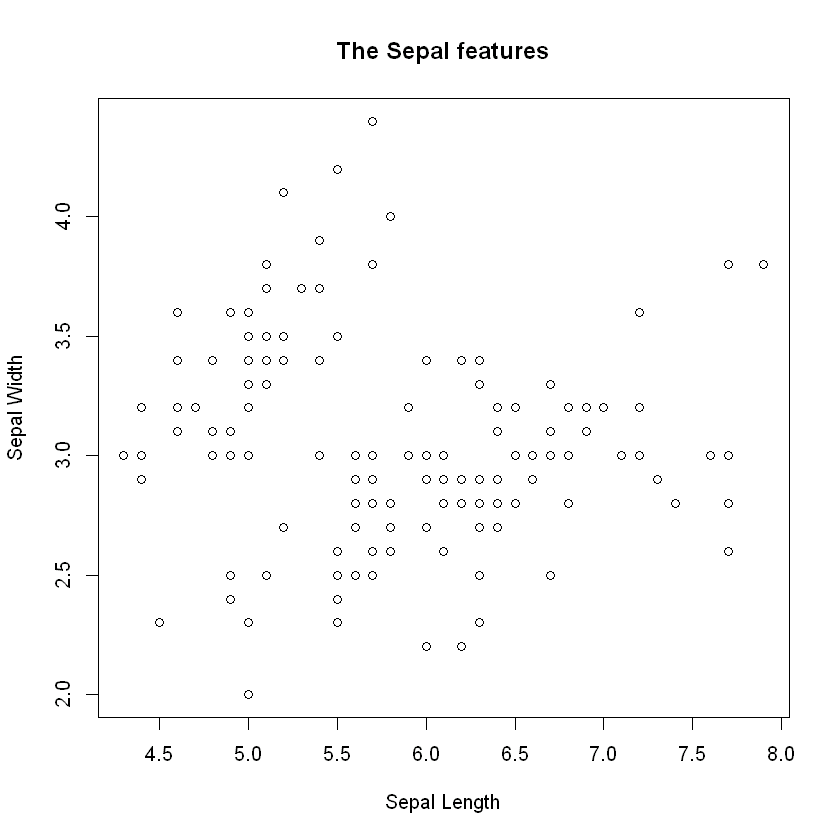

In [16]:
plot(iris$Sepal.Length, iris$Sepal.Width, main = "The Sepal features", xlab = "Sepal Length", ylab = "Sepal Width")

We can see that the negative linear correlation is in fact not an apt representation of the data. It is better to understand it in terms of clusters. In order to further assess the pattern present in our data, we include color-codes for species using the ggplot2 package.

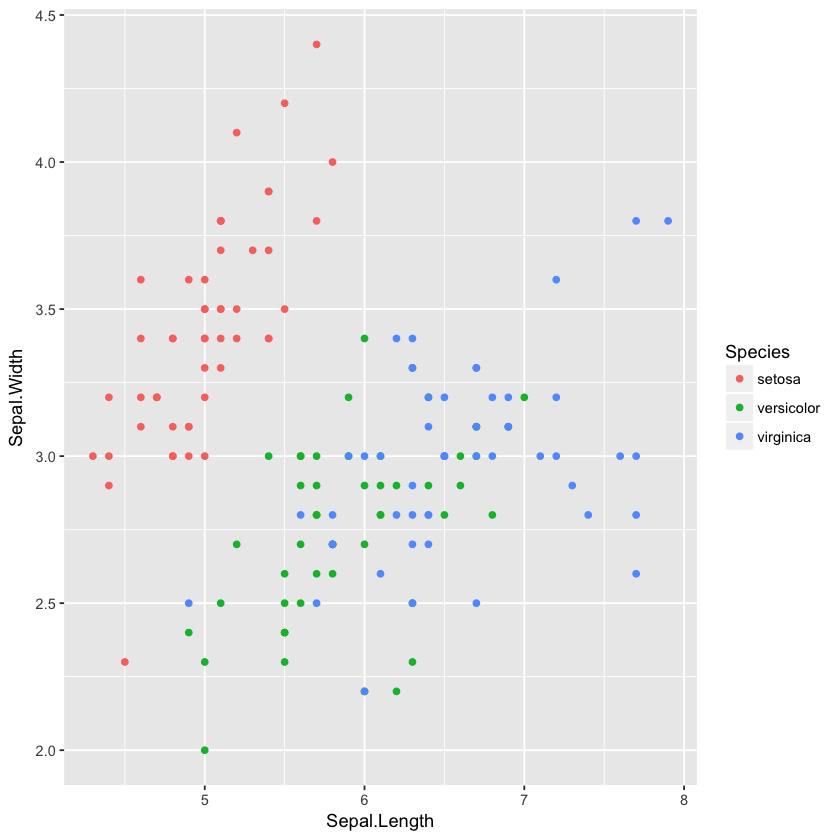

In [3]:
library(ggplot2)
ggplot(data= iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + geom_point()

It is noticeable that  
__1. There is a clear clustering behavior for setosa__  
__2. Versicolor and virginica is not clearly separated__

This kind of information is valuable in assessing what kind of model to choose, and what kind of additional analysis that needs to take before we are sure of what to do with our dataset. It is possible, however, to further embellish our visual analysis by using a 3d plot and adding in another feature. We will use the __scatterplot3d__ package for this.

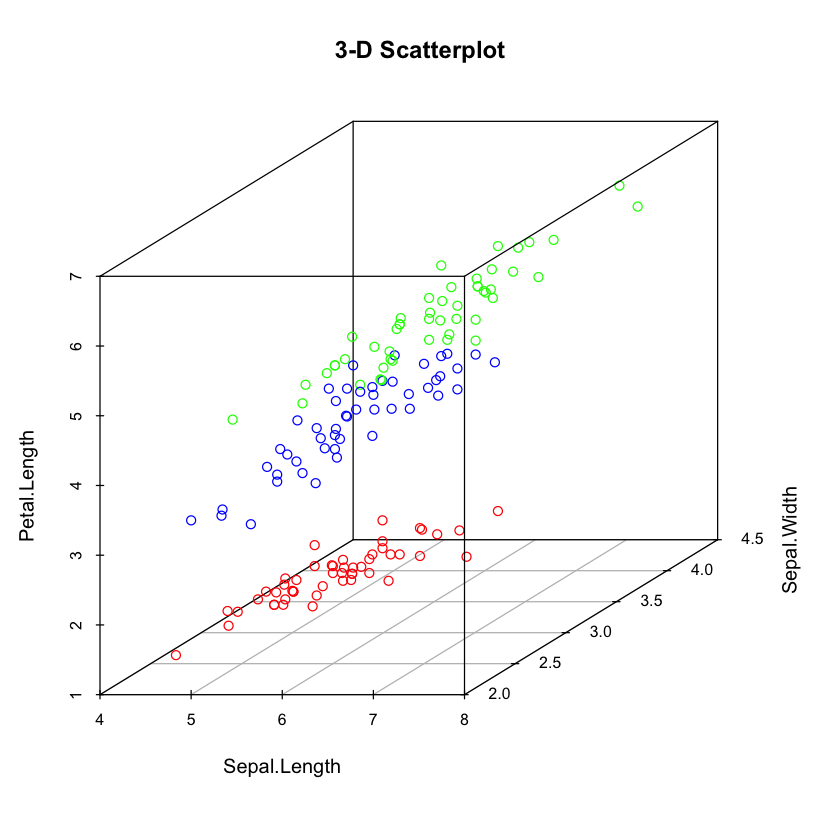

In [6]:
#install.packages("scatterplot3d", repos='http://cran.us.r-project.org')
library(scatterplot3d)
library(dplyr)

iris_mutated <- mutate(iris, Color = as.character(Species))
iris_mutated$Color <- sapply(iris_mutated$Color, function(x){
  if (x=="setosa"){return("red") }
  if (x=="versicolor"){return("blue")}
  else return("green")
})

with(iris_mutated, {
   scatterplot3d(Sepal.Length,   # x axis
                 Sepal.Width,     # y axis
                 Petal.Length,    # z axis
                 main="3-D Scatterplot",
                color = Color)
})

Looking at this 3d scatterplot, we can see that the versicolor and virginica is actually much more separable, unlike what was indicated in our previous 2d plot. We can therefore conclude that these three features are enough to implement an effective classifier.


## Common Visualization technique: Density function
While histograms are popular, density plots are favored for several reasons  
1. Histogram shape varies wildly depending on the bin size  
2. Density plots smooth out outliers and local fluctuations

The second point can be a weakness however, since local fluctuations can be very important. Let's look at an example

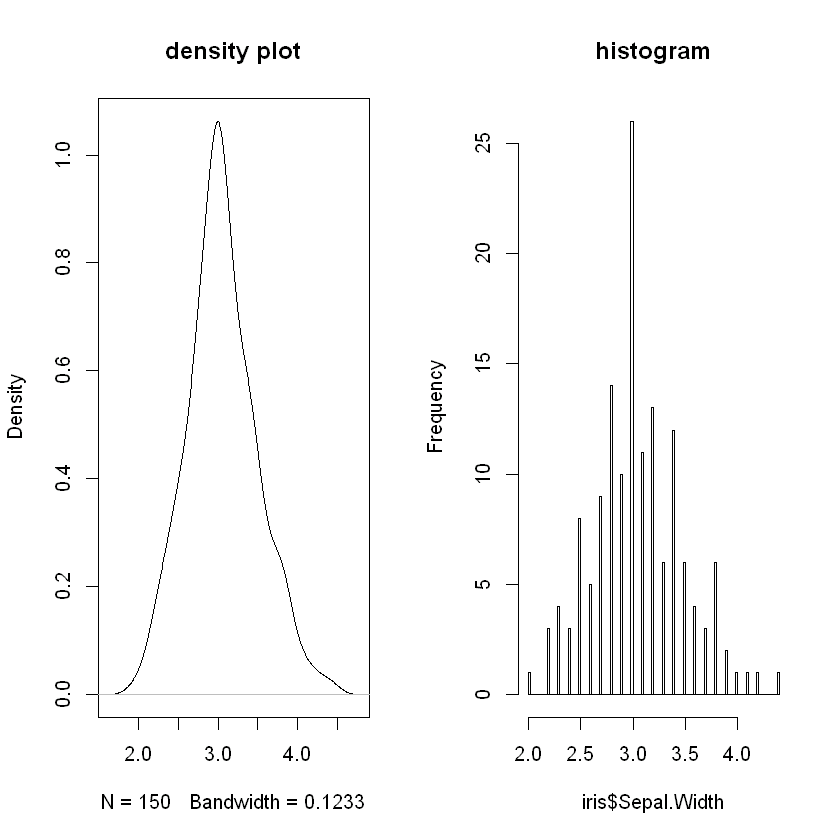

In [74]:
par(mfrow=c(1,2))
plot(density(iris$Sepal.Width), main = "density plot")
hist(iris$Sepal.Width, breaks = 100, main = "histogram")

The smoothing parameter for the density plot can be adjusted by changing something called the smoothing bandwidth in order to adjust for sensitivity to fluctuations.

The next part of the lecture notes will be using the dataset from Yelp: more specifically, of businesses in Pittsburgh.

## Advanced Visualization Techniques: heatmaps, contour plots, and using maps

In [41]:
setwd("~/Yelp/business_data")
new_bz <- jsonlite::stream_in(file("new_bz.json"))
pitt <- filter(new_bz, city == "Pittsburgh")

opening file input connection.


 Imported 85901 records. Simplifying...


closing file input connection.


## Using Maps to Visualize  
The dataset above has longitude and latitude data. In cases like this, it is often worthwhile to put these data points on a map. A map provides several advantages which include:  
1. Provide context to certain patterns or clusters present within the data
2. Provide information that can explain outliers
3. Facilitate explanations to trends that have a real life counterpart.  

Maps can be obtained using the qmap function from the `ggmap` package. 

**Note:** The newest version of `ggmap` and `ggplot2` (`ggmap 2.6.1`, `ggplot2 2.2.0`) might cause errors when you try to plot the map. If the problem persists, download the ggmap package directly from the developer's repo:

In [ ]:
# downloading ggmap directly from developer's github repo
install.packages("devtools")
install_github("dkahle/ggmap")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Pittsburgh&zoom=12&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pittsburgh&sensor=false


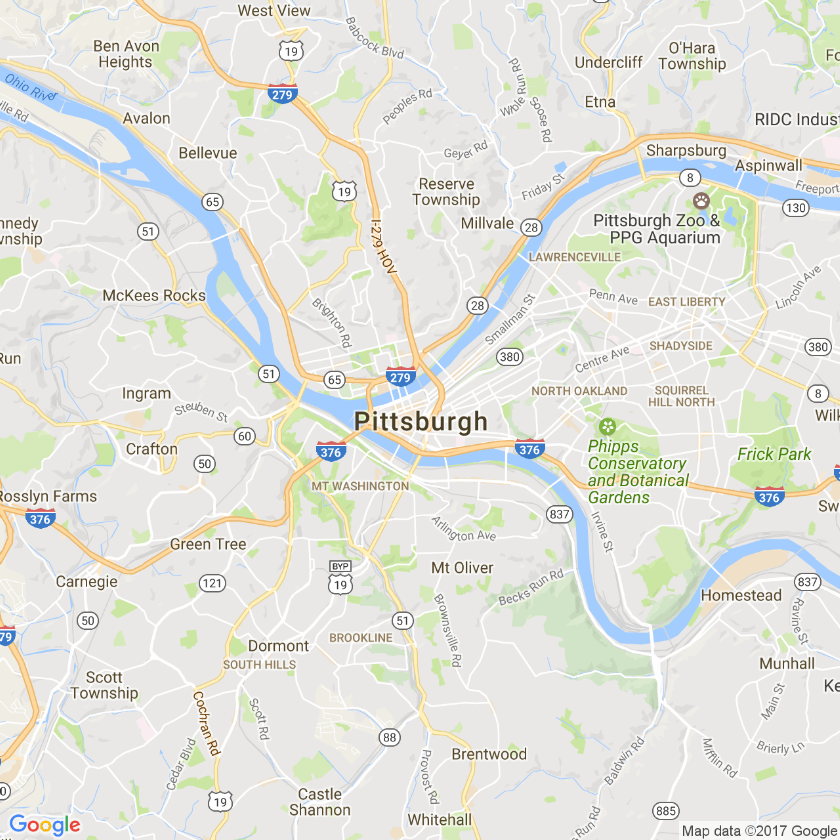

In [36]:
library(ggmap)
pitt_map <- qmap("Pittsburgh", zoom = 12, maptype = "roadmap")
pitt_map

Let's plot the business data on here!
This is done simply by attaching to our map object, pitt_map, a geom_point function from ggplot2.
Note: ggplot functions are very simple. Specify the data, and specify the mapping using the aes function.

Warning message:
: Removed 112 rows containing missing values (geom_point).

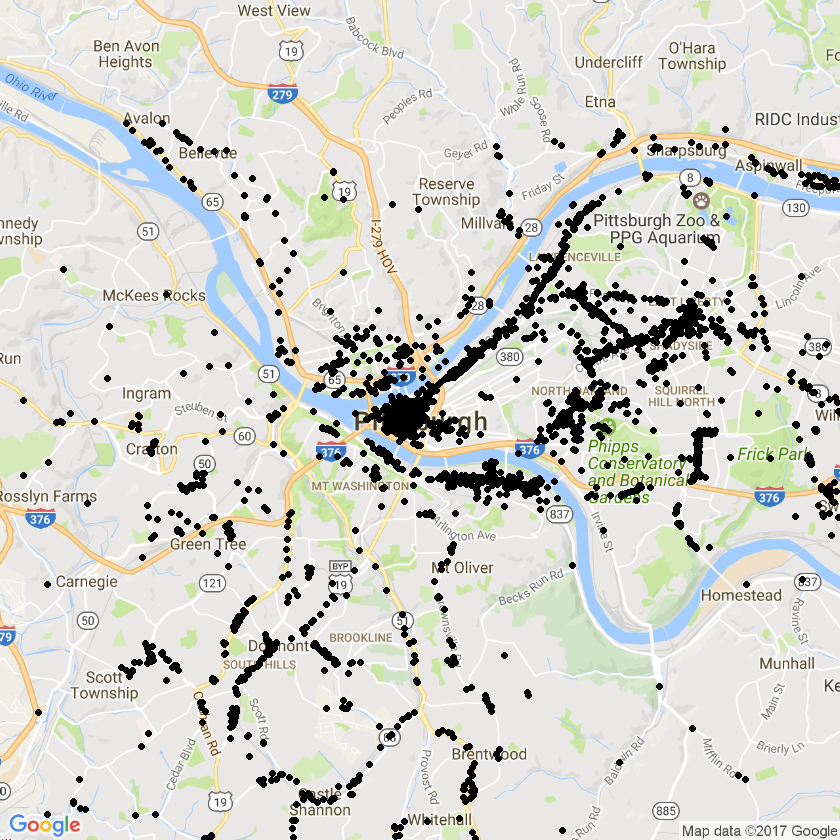

In [42]:
pitt_map + geom_point(data=pitt, aes(x = longitude, y = latitude))

The above map plotting provides context to the plot, and provides information on
1. Why there are gaps between certain data points ( rivers )
2. Why certain clusters are formed where they are ( near waterfronts and major roads )

We could process the data points into groups and create either heatmaps or contours on how where reviews occurred the most. 
For heatmaps, we use a geom_tile function, and feed the rounded latitudes and longitudes to two decimal points.  
For contour maps, we use a geom_contour function we use the original latitude and longitude data

Warning message:
: Removed 91 rows containing missing values (geom_tile).Warning message:
: Removed 112 rows containing non-finite values (stat_density2d).

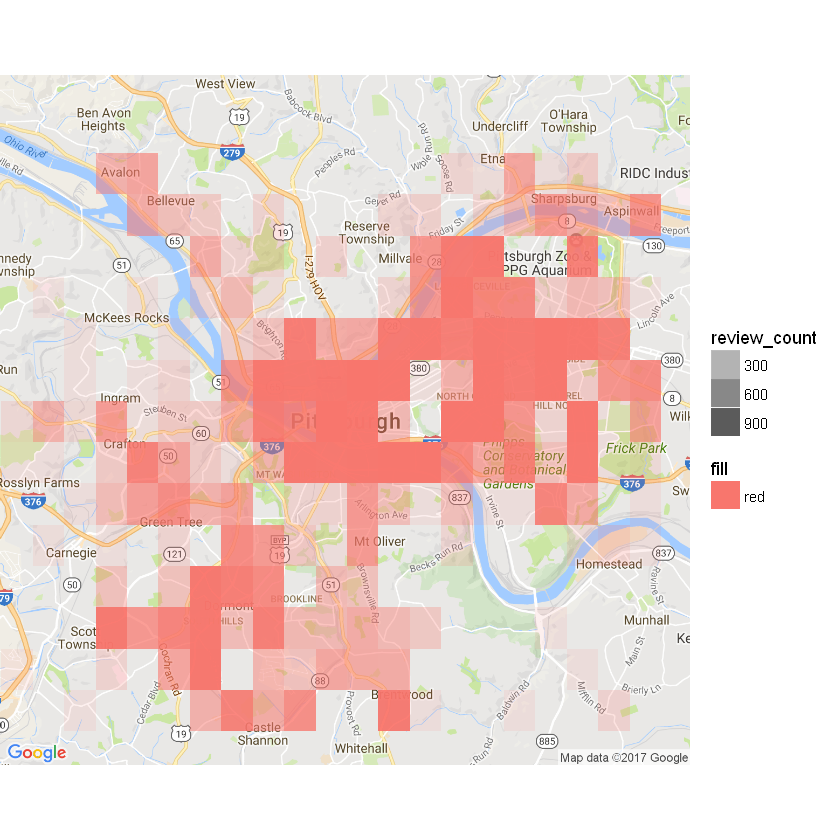

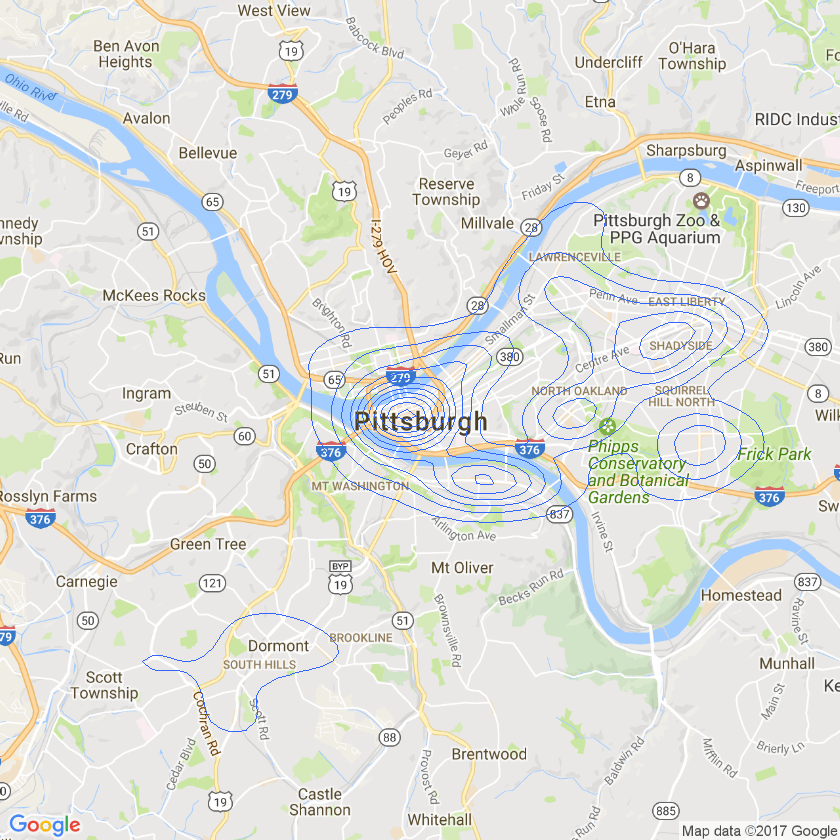

In [76]:
pitt$long <- round(pitt$longitude, 2)
pitt$lat <- round(pitt$latitude, 2)

pitt_map + geom_tile(data= pitt, aes(x= long, y = lat, alpha = review_count, fill = "red"))
pitt_map + geom_density2d(data =pitt, aes(x=longitude, y = latitude))

It is important to notice that the heatmap and contour mapping is analogous to histograms vs density plots. As such, we must be wary of the advantages and disadvantages of both types of plots.

Contour plots are useful when deciding which parameters to use (defining the number of clusters) for clustering algorithms or Gaussian Naive Bayes.

Also, notice that the ggplot2 package and plots using ggplot2 come in the following format

ggplot(data= data, aes(x = x, y=y)) + geom_point() + stat_identity()

The first part is setting up a graph, geom_point is the layer for which plot you want, and stat_identity provides additional information on the transformation used. This use of "layers" follows the intuitive logic of graphics.

## Interactive Plots

Let's use plotly package to create interactive plots. Interactivity matters because it allows further analysis and isolation of certain parts of the data. Interactive plots can be made by first using ggplot2 to create a plot, and using the ggplotly() function to convert it to an interactive plot. (use RStudio to try this!)


In [ ]:
library(plotly)
x <- ggplot(data = iris, aes(x = Sepal.Width, y = Sepal.Length)) + geom_point()
ggplotly(x)

## Animation + Shiny
There are additional visual tools that you can use, that for the scope of this course we will only mention.
Please refer to these links:  
http://shiny.rstudio.com/  
https://cran.r-project.org/web/packages/animation/animation.pdf

## Terms to review

1. Data Visualization
2. Histogram
3. Density plot
4. ggmap
5. ggplot2
6. plotly
7. animation
8. shiny

## Further reading

* An excellent introduction to GGPlot graphics from Harvard: http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html
* Plotly's website: https://plot.ly/

## Sources

[1] Hastie, Trevor, et al. _Elements of Statisical Learning_.